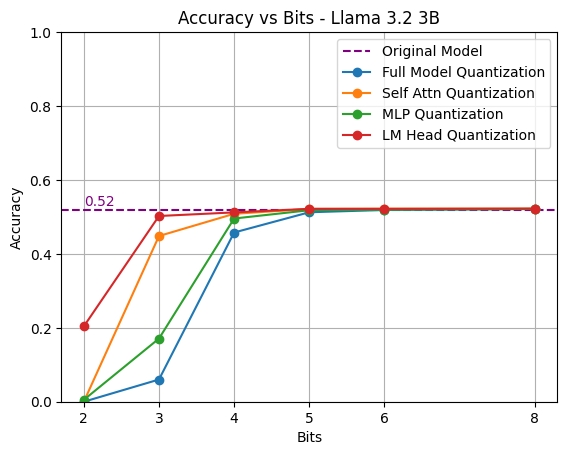

In [5]:
import json
from matplotlib import pyplot as plt

# read json from string
data = json.loads(
    '{"Full Model Quantization": [[8, 6, 5, 4, 3, 2], [0.5215200330441966, 0.5187938868236266, 0.5125980999586948, 0.4578273440726972, 0.060057827344072695, 0.0]], "Self Attn Quantization": [[8, 6, 5, 4, 3, 2], [0.5220983064849236, 0.5222635274679884, 0.521602643535729, 0.5084675753820735, 0.4483271375464684, 0.0]], "MLP Quantization": [[8, 6, 5, 4, 3, 2], [0.521602643535729, 0.5197026022304833, 0.5181330028913672, 0.49566294919454773, 0.1708384964890541, 0.005121850475010326]], "LM Head Quantization": [[8, 6, 5, 4, 3, 2], [0.5225939694341182, 0.5218504750103263, 0.5219330855018587, 0.512267657992565, 0.502519619991739, 0.20388269310202395]]}'
)
plot_data_dict = data
# plot_data_dict.pop("Attention Blocks")


original_model_accuracy = 0.5226765799256505
original_model_accuracy = round(original_model_accuracy, 2)


def plot_final_data(bits=[2, 3, 4, 5, 6, 8][::-1]):
    global plot_data_dict
    labels = []
    traces = []
    labels.append("Original Model")
    plt.axhline(y=original_model_accuracy, color="purple", linestyle="--")
    # display value of axhline slightly above the line
    plt.text(2, original_model_accuracy + 0.01, original_model_accuracy, color="purple")
    for key, values in plot_data_dict.items():
        bits, accuracies = values
        labels.append(key)
        traces.append((bits, accuracies))
    for i in range(len(traces)):
        plt.plot(traces[i][0], traces[i][1], "o-")
    # add original model accuracy as dotted line
    plt.xlabel("Bits")
    plt.xticks(bits)
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.grid(True)
    plt.title("Accuracy vs Bits - Llama 3.2 3B")
    plt.legend(labels)
    plt.show()


plot_final_data()